<a href="https://colab.research.google.com/github/astrasourav/Deep-Learning-/blob/master/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading file and importing libraries

In [1]:
from google.colab import files

files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Preprocessing the data

In [0]:
data = pd.read_csv('/content/Iris.csv')

In [0]:
# data.head()
# data.tail()

In [0]:
# Deleting non-important feature

del data['Id']

In [0]:
# divifing data inot dependent & independent variable

X = data.iloc[:, 0: 4].values
y = data.iloc[:, 4].values

In [0]:
# Encoding label

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
y = lb.fit_transform(y)
y = pd.get_dummies(y).values

In [0]:
# Dividing data into train & test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Building ANN Model

In [9]:
model = keras.models.Sequential([
                                 keras.layers.Dense(10, activation='relu', kernel_initializer='uniform', input_shape=(4,)),
                                 keras.layers.Dense(10, activation='relu', kernel_initializer='uniform'),
                                 keras.layers.Dense(3, activation='softmax', kernel_initializer='uniform')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compiling and Training the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0985 - accuracy: 0.3833
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0981 - accuracy: 0.4167
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0978 - accuracy: 0.3667
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.3667
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0967 - accuracy: 0.3667
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0958 - accuracy: 0.3667
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.3667
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0936 - accuracy: 0.3667
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0919 - accuracy: 0.3667
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0900 - accuracy: 0.3667
Epoch 11/100
4/4 [===========

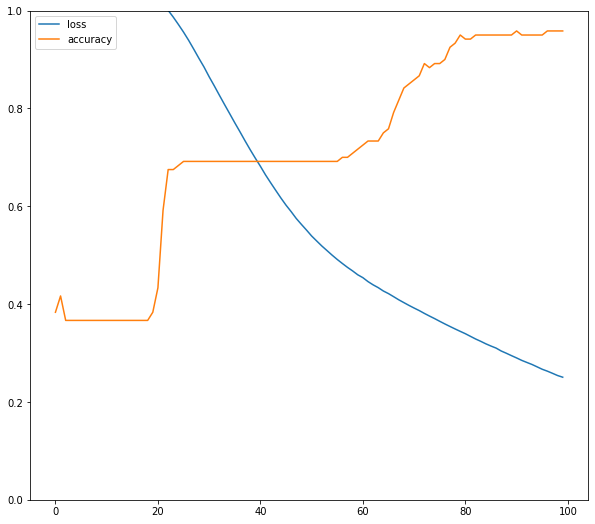

In [11]:
# Plotting graph

import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 9))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
# Evaluating the accuracy

loss_val, acc_val = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 1.0000


**0 == 1st class, 1 == 2nd class, 2 == 3r class**

In [13]:
# MAking predictions

pred = model.predict([[5.7, 2.8, 4.1, 1.3]])
a = np.argmax(pred)

if a == 0:
  print('Iris-setosa')
elif a == 1:
  print('Iris-versicolor')
elif a == 2:
  print('Iris-virginica')
else:
  print('No information available')

Iris-versicolor
